In [1]:
import pandas as pd
import numpy as np
import sklearn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
826,ham,Hahaha..use your brain dear,NaN,NaN,NaN
1656,ham,Yes I posted a couple of pics on fb. There's s...,NaN,NaN,NaN
4243,ham,"Aight, I'm chillin in a friend's room so text ...",NaN,NaN,NaN
529,ham,Jay says that you're a double-faggot,NaN,NaN,NaN
81,ham,K. Did you call me just now ah?,NaN,NaN,NaN


 1. data cleaning
 2. EDA
 3. text preprocessing
 4. model buildind
 5. evaluation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.sample(4)

,v1,v2
677,ham,"Piggy, r u awake? I bet u're still sleeping. I..."
1151,ham,"Sorry, I'll call later"
1266,ham,\Hey sorry I didntgive ya a a bellearlier hunny
3216,ham,Come to mahal bus stop.. &lt;DECIMAL&gt;


- rename the columns

In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(3)

,target,text
625,ham,"Haha good to hear, I'm officially paid and on ..."
262,ham,MY NO. IN LUTON 0125698789 RING ME IF UR AROUN...
5366,spam,A å£400 XMAS REWARD IS WAITING FOR YOU! Our co...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [9]:
df.sample(2)

,target,text
5096,0,But i'm really really broke oh. No amount is t...
3086,0,So i asked how's anthony. Dad. And your bf


- remove missing values

In [10]:
df.isnull().sum()

target    0
text      0
dtype: int64

- check duplicates

In [11]:
df.duplicated().sum()

403

In [12]:
df=df.drop_duplicates(keep='first')

In [13]:
df.shape

(5169, 2)

- EDA

In [14]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

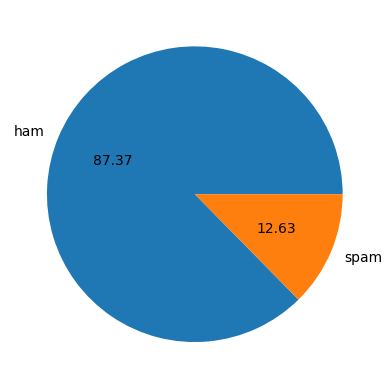

In [15]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [16]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

- nltk.punkt- is a tokenizer 

In [18]:
df['num_charecters']=df['text'].apply(len)

In [19]:
df.sample(2)

,target,text,num_charecters
4814,0,ÌÏ no home work to do meh...,29
1332,0,It's ok lar. U sleep early too... Nite...,41


In [20]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
df.sample()

,target,text,num_charecters,num_words
4322,0,Aight well keep me informed,27,5


In [22]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
df.sample()

,target,text,num_charecters,num_words,num_sentences
3269,0,K actually can you guys meet me at the sunoco ...,86,20,2


In [24]:
df.columns

Index(['target', 'text', 'num_charecters', 'num_words', 'num_sentences'], dtype='object')

In [25]:
df[['num_charecters','num_sentences','num_words']].describe()

,num_charecters,num_sentences,num_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.965564,18.455794
std,58.236293,1.448541,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,38.000000,220.000000


- Ham messeges

In [26]:
df[df['target']==0][['num_charecters','num_sentences','num_words']].describe()

,num_charecters,num_sentences,num_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.820195,17.123782
std,56.358207,1.383657,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,38.000000,220.000000


<Axes: xlabel='num_charecters', ylabel='Count'>

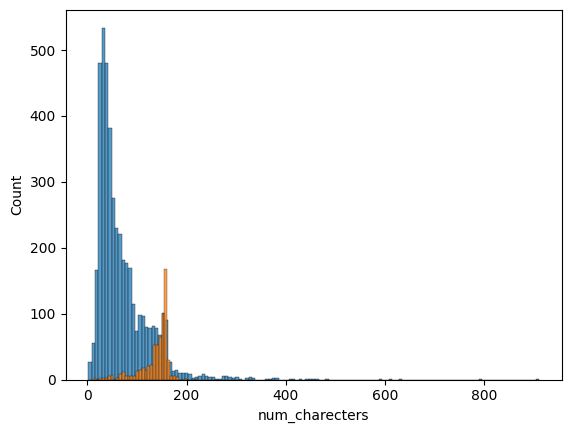

In [27]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_charecters'])
sns.histplot(df[df['target']==1]['num_charecters'])

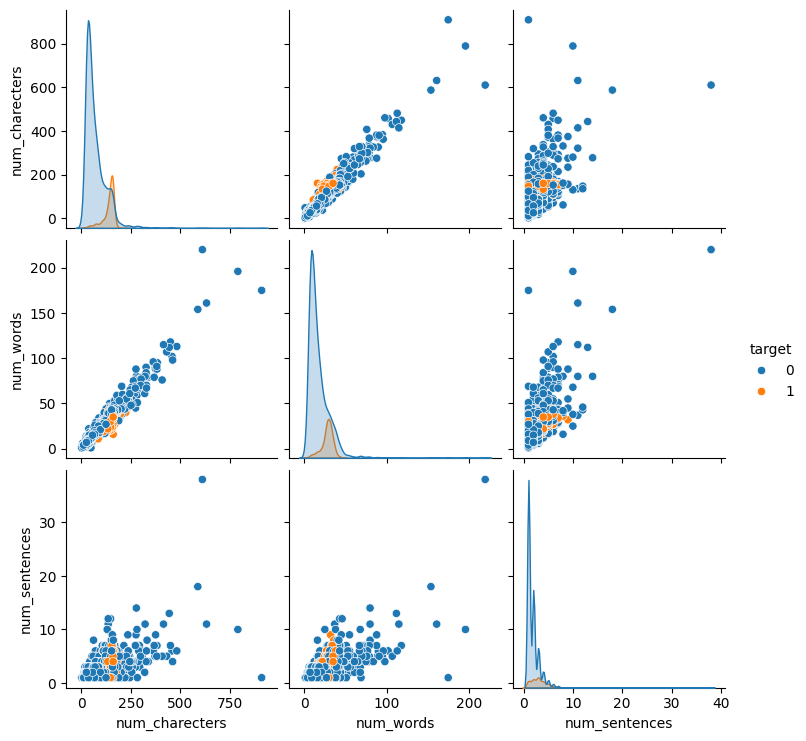

In [28]:
sns.pairplot(df,hue='target')

<Axes: >

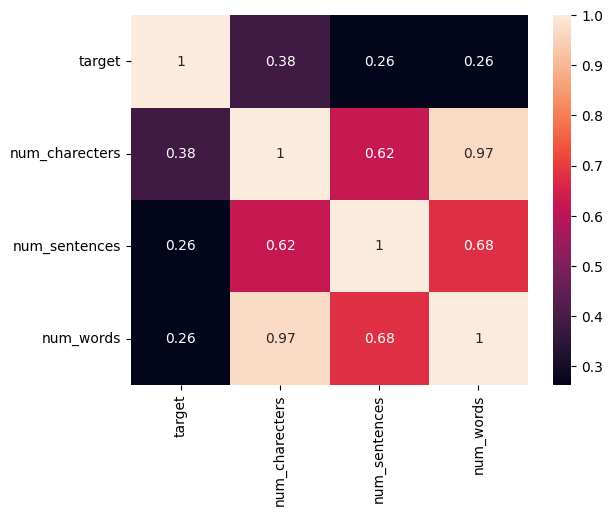

In [29]:
sns.heatmap(df[['target','num_charecters',	'num_sentences',	'num_words']].corr(),annot=True)

- data preprocessing
1. lowercase 
2. tokenize
3. stopword removal 
4. remove special charecter
5. punctution
6. stemming

In [32]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords.words('english')

In [35]:
from nltk.stem.porter import PorterStemmer
st=PorterStemmer()

In [37]:
import string


- transform func->
- apply above methods-> clean data

In [38]:
def transform_text(text):
 text=text.lower() #lowercase
 text=nltk.word_tokenize(text) #tokenize
 y=[]
 for i in text:
  if i.isalnum(): # if char is alphanumeric (a-z,1-9)
   y.append(i)
 text=y[:]
 y.clear()

 for i in text: #stopword and puctuation removal
  if i not in stopwords.words('english') and i not in string.punctuation:
   y.append(i)
 text=y[:]
 y.clear()

 for i in text:
  y.append(st.stem(i))
 return " ".join(y)
 



In [39]:
transform_text("I'm gona home soon and i don't wana talk.") 

'gona home soon wana talk'

In [40]:
df['transform_text']=df['text'].apply(transform_text)

In [41]:
df.sample(3)

,target,text,num_charecters,num_words,num_sentences,transform_text
3075,0,"Mum, hope you are having a great day. Hoping t...",112,27,4,mum hope great day hope text meet well full li...
5077,1,Do you want a New Nokia 3510i colour phone Del...,158,30,2,want new nokia 3510i colour phone deliveredtom...
2166,0,"Thank you. And by the way, I just lost.",39,12,2,thank way lost


In [42]:
! pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ------------ --------------------------- 92.2/299.9 kB 5.1 MB/s eta 0:00:01
   ----------------------- ---------------- 174.1/299.9 kB 2.6 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/299.9 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 1.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import wordcloud
from wordcloud import WordCloud

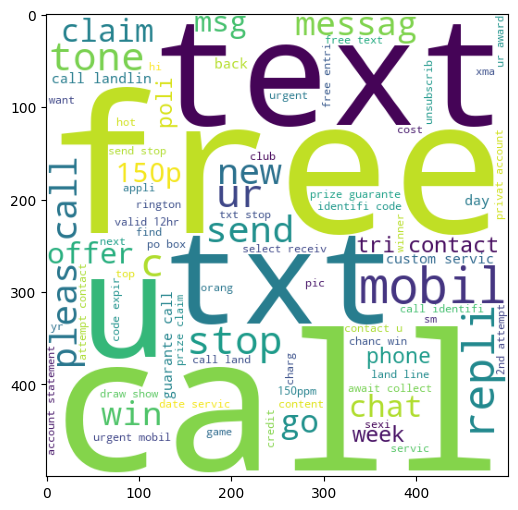

In [48]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

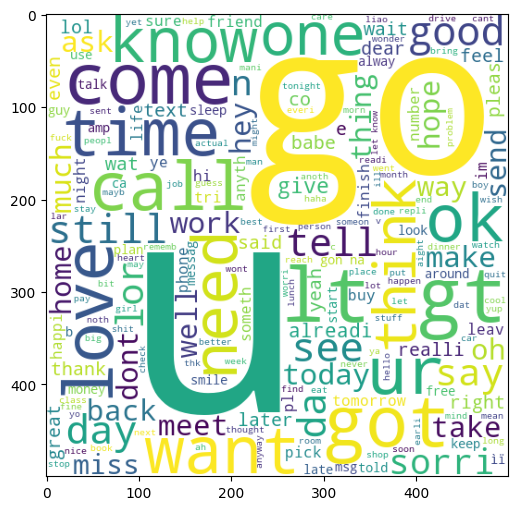

In [50]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [51]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

9939

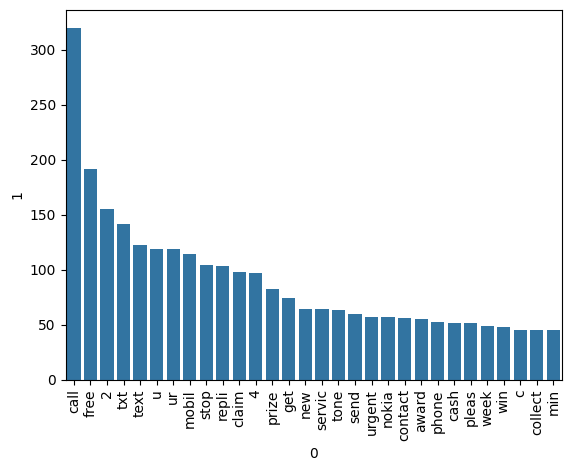

In [55]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


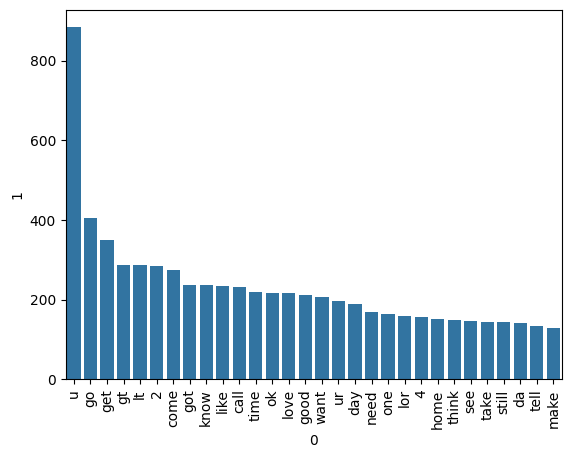

In [57]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

- model building 

In [58]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)


In [59]:
x=tfidf.fit_transform(df['transform_text']).toarray()

In [60]:
x.shape

(5169, 3000)

In [61]:
x[0].shape

(3000,)

In [62]:
y=df['target'].values

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [64]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [65]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)


In [66]:
gnb.fit(xtrain,ytrain)
ypred1=gnb.predict(xtest)
print(accuracy_score(ytest,ypred1))
print(confusion_matrix(ytest,ypred1))
print(precision_score(ytest,ypred1))

0.8597678916827853
[[778 121]
 [ 24 111]]
0.47844827586206895


In [69]:
mnb.fit(xtrain,ytrain)
ypred1=mnb.predict(xtest)
print(accuracy_score(ytest,ypred1))
print(confusion_matrix(ytest,ypred1))
print(precision_score(ytest,ypred1))

0.9613152804642167
[[899   0]
 [ 40  95]]
1.0


In [70]:
bnb.fit(xtrain,ytrain)
ypred1=bnb.predict(xtest)
print(accuracy_score(ytest,ypred1))
print(confusion_matrix(ytest,ypred1))
print(precision_score(ytest,ypred1))

0.9700193423597679
[[898   1]
 [ 30 105]]
0.9905660377358491


In [71]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))